# Figure 1

Figure panels for UCSF-Biohub COVID Tissue Atlas. <br>
Nov 2021 <br>
Authors: Alejandro Granados, Ann Chen <br>

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scanpy as sc 
import numpy as np
import pandas as pd
import seaborn as sns

In [48]:
pwd

'/mnt/ibm_lg/covid_tissue_atlas/notebooks/figures'

Plotting parameters

In [127]:
mpl.rcParams.update(mpl.rcParamsDefault) #Reset rcParams to default
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Colors in this style
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

# Plotting style function (run this before plotting the final figure)
def set_plotting_style():
    plt.style.use('seaborn-paper')
    plt.rc('axes', labelsize=12)
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=2)
    plt.rc('ytick.major', pad=2)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[10,9])
    plt.rc('svg', fonttype='none')

Plotting functions 

In [60]:
def stylize_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.xaxis.set_tick_params(top='off', direction='out', width=0)
    ax.yaxis.set_tick_params(right='off', direction='out', width=0)
    
def custom_barchart(ax, x, y, error, xlims, ylims, error_kw, color='lightblue', width=0.75):
    """Customized bar chart with positive error bars only."""

    error = [np.zeros(len(error)), error]

    ax.bar(x, y, color=color, width=width, yerr=error, error_kw=error_kw, align='center')

    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
    
def stylize_axes(ax, title, xlabel, ylabel ): #, xticks, yticks, xticklabels, yticklabels):
    """Customize axes spines, title, labels, ticks, and ticklabels."""
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.xaxis.set_tick_params(top='off', direction='out', width=0)
    ax.yaxis.set_tick_params(right='off', direction='out', width=0)
    
    ax.set_title(title)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
#     ax.set_xticks(xticks)
#     ax.set_yticks(yticks)
    
#     ax.set_xticklabels(xticklabels)
#     ax.set_yticklabels(yticklabels)


Load datasets

In [115]:
DATA_DIR = '/mnt/ibm_lg/covid_tissue_atlas/data/tissue_objects/all_tissues/'

adata = sc.read_h5ad(DATA_DIR + 'all_tissues_atlas_portal_feb22.h5ad')

Number of cells per organ and COVID state

In [116]:
from matplotlib import cm

stacked_df = adata.obs[['disease_status', 'tissue']]
cluster_disease = stacked_df.pivot_table(index='tissue', columns=['disease_status'], aggfunc='size')
#cluster_disease_pct = cluster_disease.div(cluster_disease.sum(axis=0), axis=1) * 100

organs_covid = cluster_disease.sort_values(by ="Cov19", ascending = False )



Organs and cells per donor 

In [118]:
# import libraries
import matplotlib.patches as mpatches

donor_col = 'donorID'
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# set the figure size
df = adata.obs
# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
stacked_df = adata.obs[[donor_col, 'tissue']]

cluster_disease = stacked_df.pivot_table(index = donor_col, columns='tissue', aggfunc='size')

sorted_donors = cluster_disease.sum(axis = 1).sort_values()


In [159]:
adata.obs.tissue.value_counts() 

lung        21474
heart       20091
liver       15657
testis      13222
prostate    10872
kidney       4060
Name: tissue, dtype: int64

In [161]:
adata[adata.obs.tissue=='lung'].obs.donorID.value_counts() 

UCSF-4-9      5346
UCSF-12-14    4352
UCSF-4-20     2232
TXP32         1921
S99           1720
TS06          1172
UCSF-1-6      1006
TS02           726
S36            712
UCSF-1-5       600
UCSF-12-1      570
S34            381
S112           293
S100           235
S38            208
Name: donorID, dtype: int64

In [120]:
adata.obs.head() 

,cell_type_annotation,sampleID,donorID,leiden,disease_status,tissue,batch,race,age,source,sex,test_positive_hrs_before_death,cell_class,cell_ontology_class
index,,,,,,,,,,,,,,
S02_CAACAACAGGAACGTC-1,epithelial cell of proximal tubule,S02_kidney,S02,20,Cov19,kidney,0,White,74,Saarland,F,24.0,epithelial,epithelial cell of proximal tubule
S02_CACTGAACACTGGACC-1,epithelial cell of proximal tubule,S02_kidney,S02,20,Cov19,kidney,0,White,74,Saarland,F,24.0,epithelial,epithelial cell of proximal tubule
S02_TTCCTTCCAAACCATC-1,renal principal cell,S02_kidney,S02,8,Cov19,kidney,0,White,74,Saarland,F,24.0,epithelial,renal principal cell
S02_CTCCATGGTTGGTGTT-1,kidney loop of henle thick ascending limb epit...,S02_kidney,S02,8,Cov19,kidney,0,White,74,Saarland,F,24.0,epithelial,kidney loop of henle thick ascending limb epit...
S02_CTACATTAGCCTATCA-1,renal principal cell,S02_kidney,S02,8,Cov19,kidney,0,White,74,Saarland,F,24.0,epithelial,renal principal cell


In [121]:
adata.obs.groupby(['disease_status', 'donorID']).size() 

disease_status  donorID   
Control         527               0
                S02               0
                S34               0
                S36               0
                S38             534
                S91               0
                S99               0
                S100              0
                S112              0
                TS02          12837
                TS06           3481
                TXP32             0
                UCSF-1-5          0
                UCSF-1-6          0
                UCSF-4-9       5346
                UCSF-4-20      2232
                UCSF-12-1         0
                UCSF-12-14        0
                UCSF-12-22        0
                UCSF-12-29        0
Cov19           527            1915
                S02            2152
                S34             937
                S36             712
                S38               0
                S91            2098
                S99            2641
 

In [122]:
adata[adata.obs['tissue']=='heart'].obs.groupby(['disease_status']).size()

disease_status
Control     6092
Cov19      13999
dtype: int64

In [88]:
temp_adata = adata[adata.obs.tissue=='heart'].copy() 
#temp_adata[temp_adata.obs['disease_status']=='Control'].obs.donorID.value_counts()
temp_adata.obs.donorID.value_counts()

TS02          6092
UCSF-1-5      4196
UCSF-12-29    2530
S91           2099
S100          1455
S99            921
UCSF-12-1      885
S112           728
S34            556
527            391
UCSF-12-22     239
Name: donorID, dtype: int64

# Main panels

## Numbers of cells by organ and donor

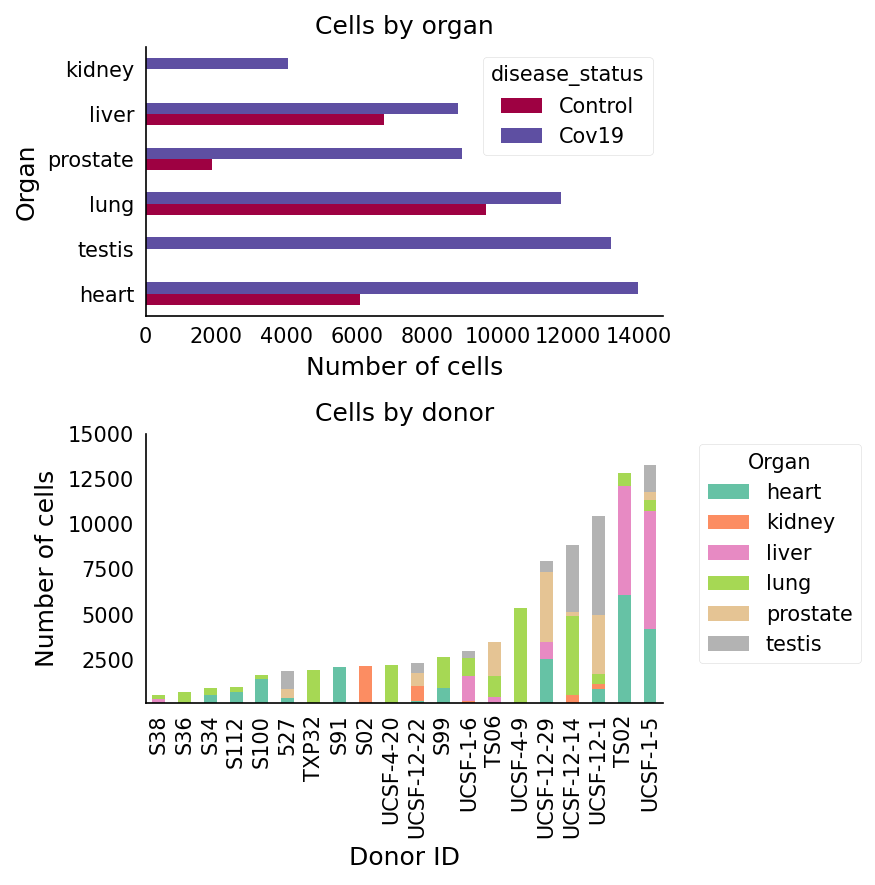

In [128]:
set_plotting_style() 

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,6), dpi = 150)

# Panel A 
cmap = cm.get_cmap('Spectral') # Colour map (there are many others)

organs_covid.plot(kind='barh', stacked=False, 
                     colormap=cmap,
                     grid = False,ax = ax[0])

# Panel B 
cmap = cm.get_cmap('Set2') # Colour map (there are many others)

#ax[1].set_yscale('log')
cluster_disease.loc[sorted_donors.index].plot(kind='bar', 
                                              stacked=True, 
                                              ax = ax[1],
                                              cmap = cmap, 
                                              grid =False, ylim = (100,20000) )
ax[1].legend(bbox_to_anchor=(1.05, 1), title = 'Organ')
# plt.legend(loc='upper left', 
#             title='Organ'
#            )
plt.ylim((100,15000))

titles = ['Cells by organ', 'Cells by donor']
xlabels = ['Number of cells','Donor ID']
ylabels = ['Organ','Number of cells']

for i,axes in enumerate( ax.flat):
     stylize_axes(axes, titles[i], xlabels[i], ylabels[i])
        
plt.tight_layout()

fig.savefig('Figure1_barplots.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show() 

In [155]:
adata.obs.groupby(['tissue','disease_status']).size() 

tissue    disease_status
heart     Control            6092
          Cov19             13999
kidney    Control               0
          Cov19              4060
liver     Control            6768
          Cov19              8889
lung      Control            9684
          Cov19             11790
prostate  Control            1886
          Cov19              8986
testis    Control               0
          Cov19             13222
dtype: int64

In [158]:
adata[adata.obs.tissue=='heart'].obs.groupby(['sampleID','disease_status']).size() 

sampleID          disease_status
527_heart         Control              0
                  Cov19              391
S34_heart         Control              0
                  Cov19              556
S91_heart         Control              0
                  Cov19             2098
S99_heart         Control              0
                  Cov19              921
S100_heart        Control              0
                  Cov19             1455
S112_heart        Control              0
                  Cov19              728
TS02_heart        Control           6092
                  Cov19                0
UCSF-1-5_heart    Control              0
                  Cov19             4196
UCSF-12-1_heart   Control              0
                  Cov19              885
UCSF-12-22_heart  Control              0
                  Cov19              239
UCSF-12-29_heart  Control              0
                  Cov19             2530
dtype: int64

How many female donors we have? 

Age range for all patients and median age

### Atlas UMAPs

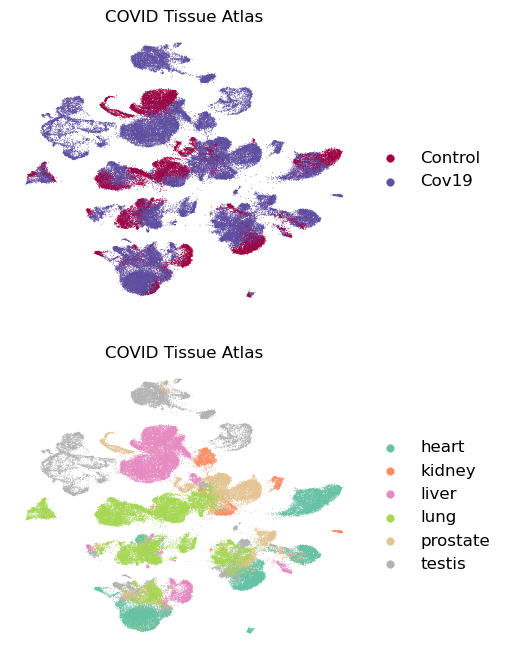

In [143]:
from matplotlib.pyplot import rc_context
set_plotting_style() 
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(4.5,8))



sc.pl.umap(adata, color='disease_status', add_outline=False, legend_loc='right margin',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='COVID Tissue Atlas', palette='Spectral',
               ax=ax[0], show = False)
    
sc.pl.umap(adata, color='tissue', add_outline=False, legend_loc='right margin',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='COVID Tissue Atlas', palette='Set2',
               ax = ax[1], show = False)

fig.savefig('Figure1_umaps.png', dpi=400, bbox_inches='tight', transparent=True)

plt.show() 

In [130]:
pwd

'/mnt/ibm_lg/covid_tissue_atlas/notebooks/figures'

Summary of donors in the dataset 

In [135]:
ff = adata[adata.obs.disease_status=='Control'].obs.groupby(['tissue',donor_col]).size() 

ff = pd.DataFrame(ff)
ff.reset_index(inplace = True)

ff.rename(columns = {0:'n_cells'}, inplace =True)
ff.pivot_table(columns = donor_col, index = "tissue", values = "n_cells")

donorID,S38,TS02,TS06,UCSF-4-9,UCSF-4-20
tissue,,,,,
heart,0,6092,0,0,0
liver,326,6019,423,0,0
lung,208,726,1172,5346,2232
prostate,0,0,1886,0,0


In [136]:
ff = adata[adata.obs.disease_status=='Cov19'].obs.groupby(['tissue',donor_col]).size() 

ff = pd.DataFrame(ff)
ff.reset_index(inplace = True)

ff.rename(columns = {0:'n_cells'}, inplace =True)
ff.pivot_table(columns = donor_col, index = "tissue", values = "n_cells")

donorID,527,S02,S34,S36,S91,S99,S100,S112,TXP32,UCSF-1-5,UCSF-1-6,UCSF-12-1,UCSF-12-14,UCSF-12-22,UCSF-12-29
tissue,,,,,,,,,,,,,,,
heart,391,0,556,0,2098,921,1455,728,0,4196,0,885,0,239,2530
kidney,0,2152,0,0,0,0,0,0,0,0,223,288,572,825,0
liver,0,0,0,0,0,0,0,0,0,6551,1366,0,0,0,972
lung,0,0,381,712,0,1720,235,293,1921,600,1006,570,4352,0,0
prostate,523,0,0,0,0,0,0,0,0,429,0,3264,212,727,3831
testis,1001,0,0,0,0,0,0,0,0,1487,419,5463,3692,538,622


### Rename columns and saved for portal 

In [141]:
del adata.obs['batch']

In [68]:
#adata.obs.rename(columns={"10X_run": "donorID", "sample_origin": "sampleID"}, inplace = True)

In [142]:
adata.write('/mnt/ibm_lg/covid_tissue_atlas/data/tissue_objects/all_tissues/portal/CTA_all_Feb22.h5ad')

In [149]:
adata.obs.cell_type_annotation =adata.obs.cell_type_annotation.astype(str)
adata.obs.loc[adata.obs.cell_type_annotation=='type ii pnuemocyte', 'cell_type_annotation'] ='AT2'
adata.obs.loc[adata.obs.cell_type_annotation=='type i pneumocyte', 'cell_type_annotation'] ='AT1'

In [153]:
adata.write('/mnt/ibm_lg/covid_tissue_atlas/data/tissue_objects/all_tissues/portal/CTA_all_Mar2022.h5ad')